In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("housing.csv")

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
df.dropna(inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [49]:
from sklearn.model_selection import train_test_split
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [50]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [51]:
train_data =x_train.join(y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

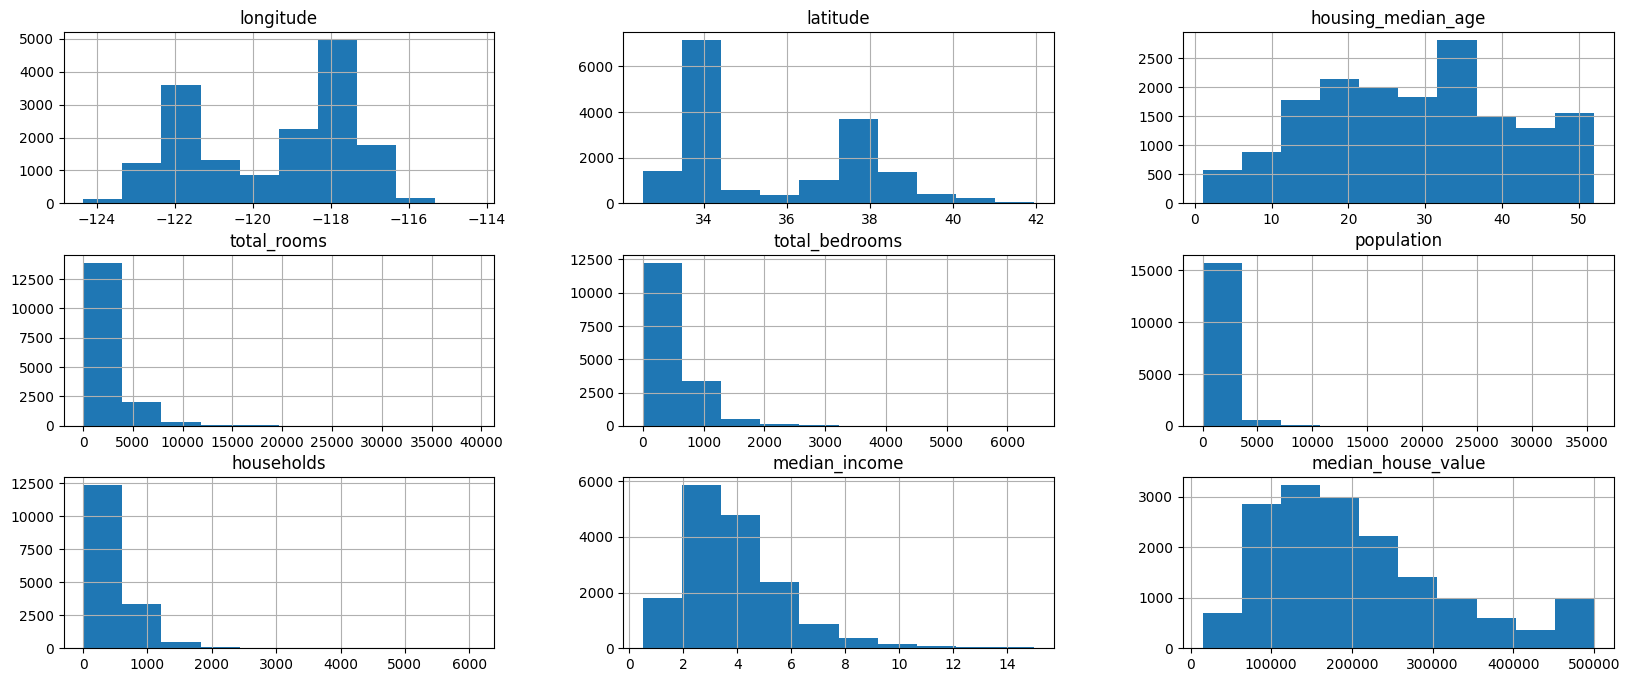

In [52]:
train_data.hist(figsize=(20,8))

In [53]:
train_data.corr()

<ipython-input-53-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924298,-0.107414,0.044121,0.066073,0.100504,0.053553,-0.008148,-0.042547
latitude,-0.924298,1.000000,0.009800,-0.036131,-0.063990,-0.109893,-0.069792,-0.086819,-0.147938
housing_median_age,-0.107414,0.009800,1.000000,-0.358150,-0.319339,-0.292477,-0.301401,-0.116783,0.102932
total_rooms,0.044121,-0.036131,-0.358150,1.000000,0.931146,0.856649,0.919168,0.202817,0.138253
total_bedrooms,0.066073,-0.063990,-0.319339,0.931146,1.000000,0.879432,0.979414,-0.004488,0.051634
population,0.100504,-0.109893,-0.292477,0.856649,0.879432,1.000000,0.908962,0.007118,-0.020304
households,0.053553,-0.069792,-0.301401,0.919168,0.979414,0.908962,1.000000,0.016732,0.067324
median_income,-0.008148,-0.086819,-0.116783,0.202817,-0.004488,0.007118,0.016732,1.000000,0.691128
median_house_value,-0.042547,-0.147938,0.102932,0.138253,0.051634,-0.020304,0.067324,0.691128,1.000000


<ipython-input-54-b3a8ffe0f0ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='BuPu')


<Axes: >

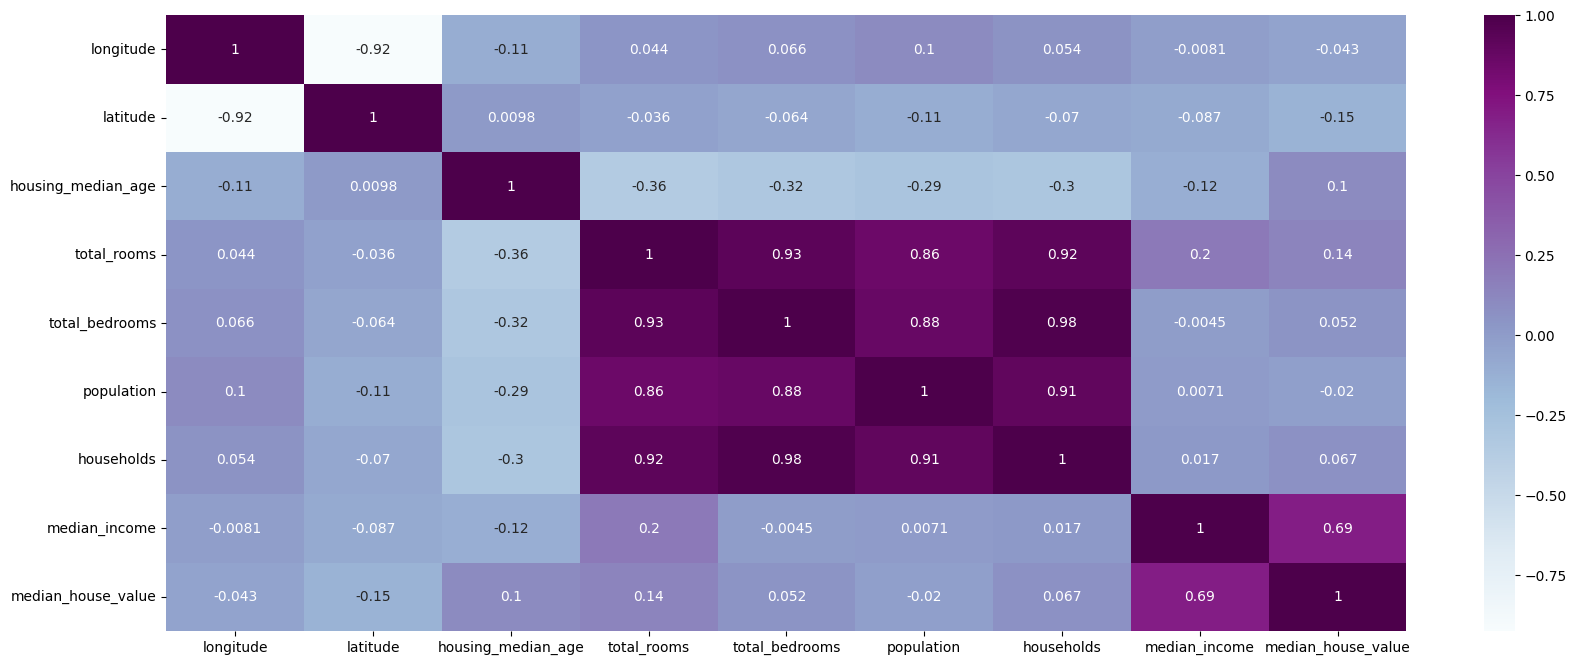

In [54]:
plt.figure(figsize=(20,8))
sns.heatmap(train_data.corr(),annot=True,cmap='BuPu')

In [55]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

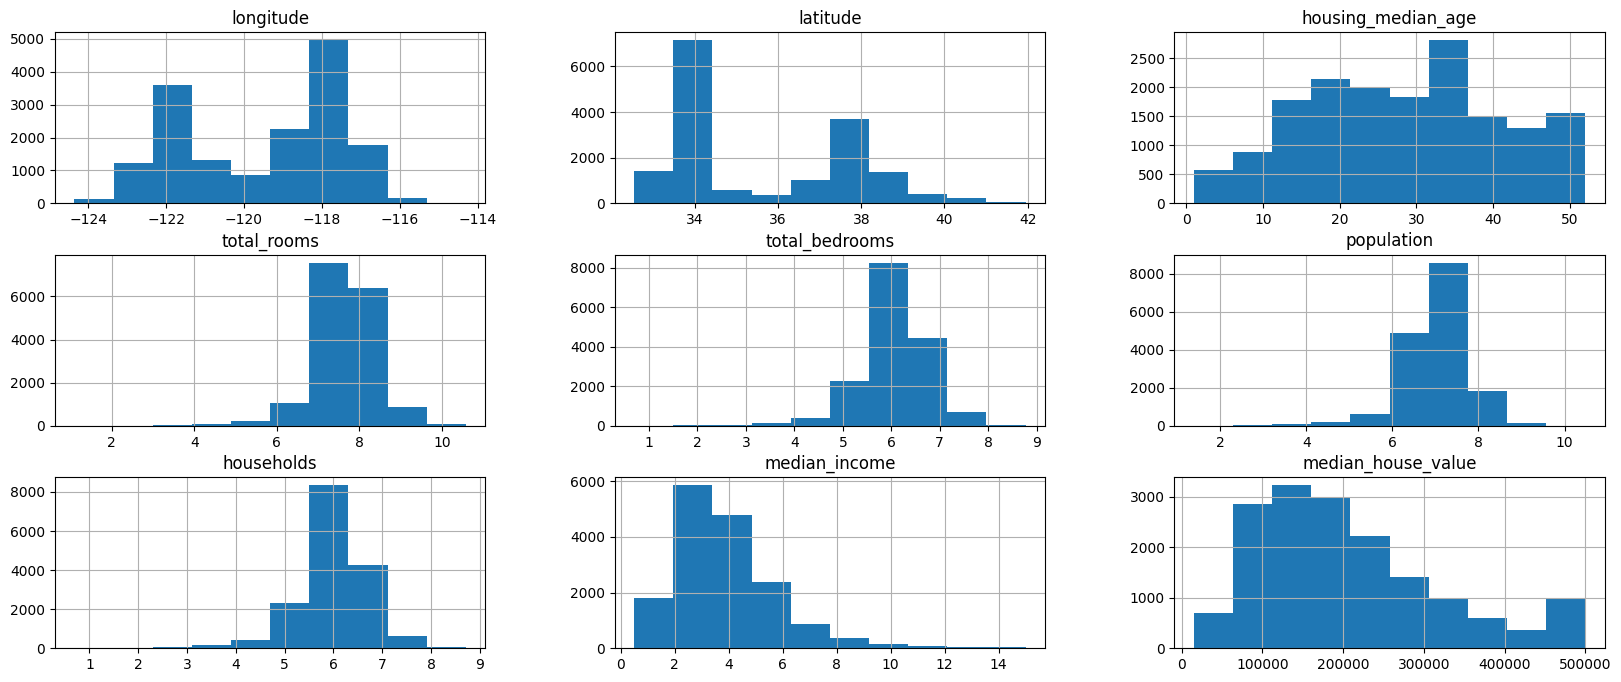

In [56]:
train_data.hist(figsize=(20,8))

In [57]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

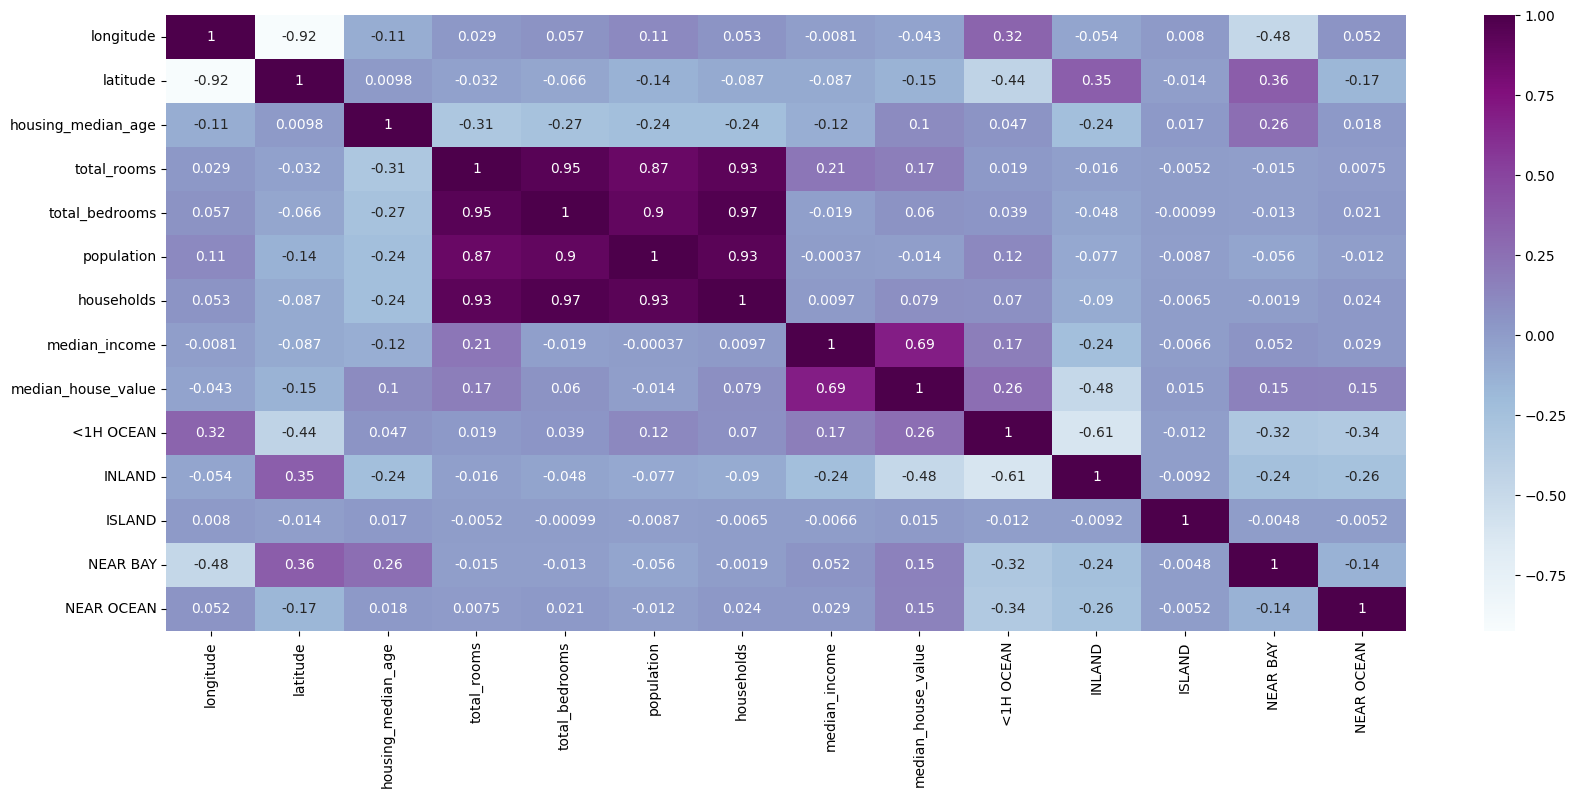

In [58]:
plt.figure(figsize=(20,8))
sns.heatmap(train_data.corr(),annot=True,cmap='BuPu')

<Axes: xlabel='latitude', ylabel='longitude'>

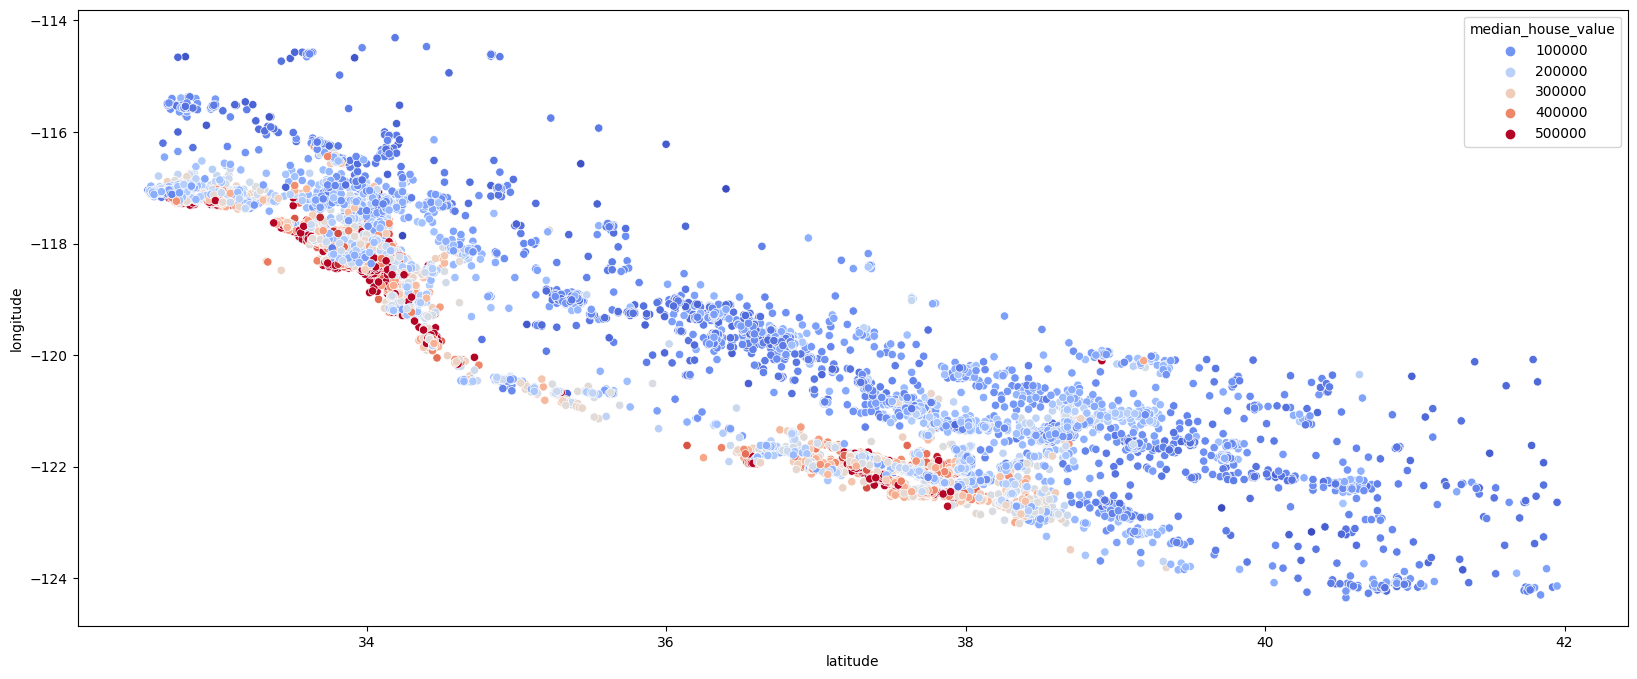

In [59]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue="median_house_value",palette="coolwarm")

In [60]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household-rooms']=train_data['total_rooms']/train_data['households']


<Axes: >

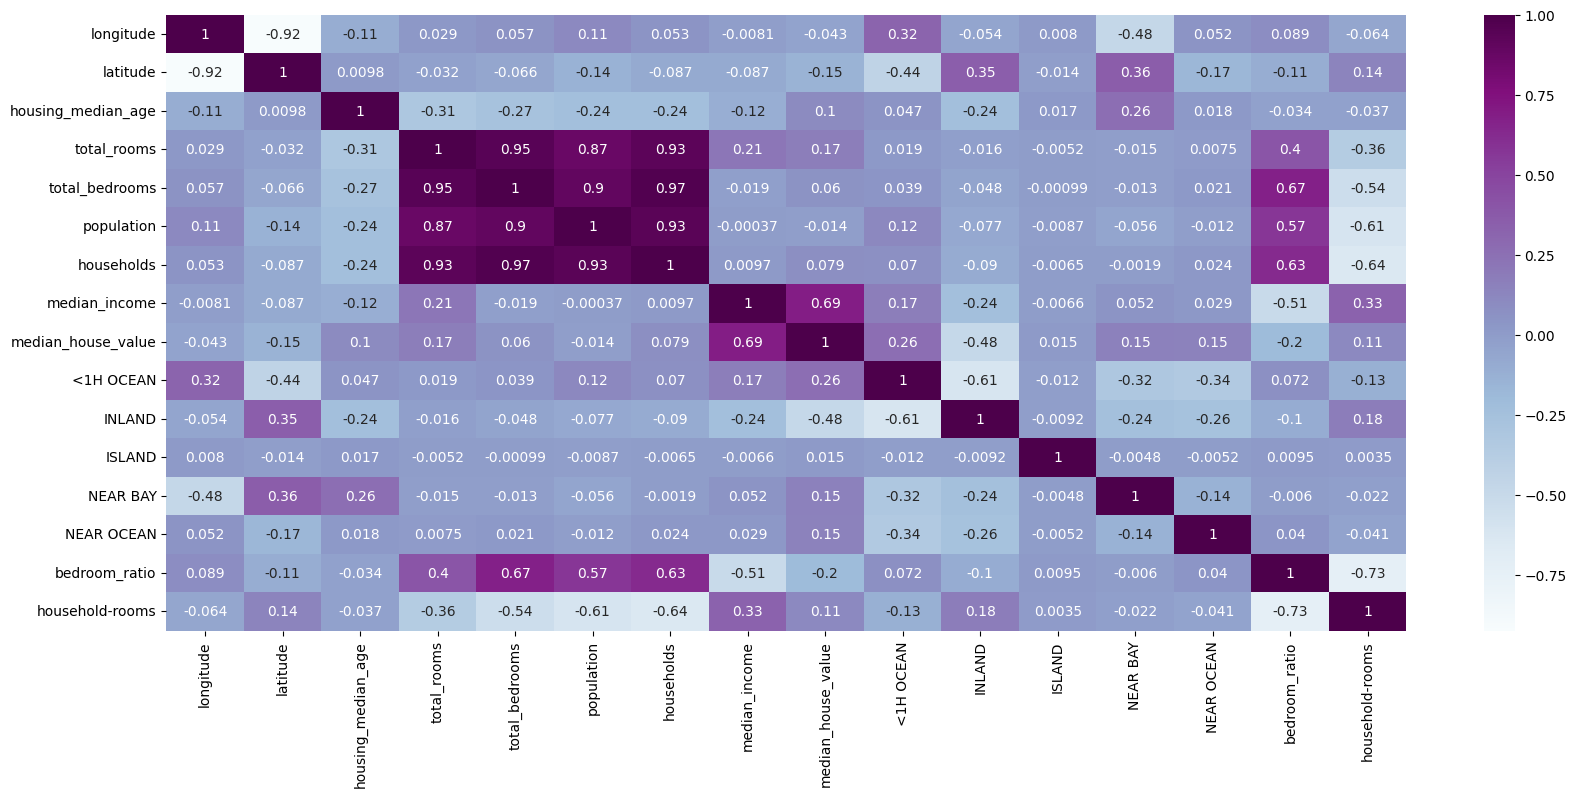

In [61]:
plt.figure(figsize=(20,8))
sns.heatmap(train_data.corr(),annot=True,cmap='BuPu')

In [62]:
from sklearn.linear_model import LinearRegression
x_train,y_train= train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
test_data =x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household-rooms']=test_data['total_rooms']/test_data['households']
x_test,y_test= test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [64]:
reg.score(x_test,y_test)

0.6703573854038058

In [65]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(x_train,y_train)


RandomForestRegressor()

In [66]:
forest.score(x_test,y_test)


0.8246700861094561

In [67]:
from sklearn.linear_model import Lasso


In [68]:
lasso_model=Lasso(alpha=0.1).fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.405e+13, tolerance: 2.186e+10
  model = cd_fast.enet_coordinate_descent(


In [69]:
y_pred = lasso_model.predict(x_test)


In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))


65778.0191544178

In [72]:
from sklearn.linear_model import LassoCV
# lasso_cv_model = LassoCV(alphas = None,cv=10,max_iter=10000,normalize =True)

In [75]:
lasso_cv_model = LassoCV(alphas = None,cv=10,max_iter=10000)

In [76]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [78]:
optimized_alpha=lasso_cv_model.alpha_

In [80]:
lasso_tuned = Lasso(alpha = optimized_alpha)
lasso_tuned.fit(x_train, y_train)

Lasso(alpha=152.53440154740827)

In [81]:
y_pred = lasso_tuned.predict(x_test)

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

66059.22991702454

In [83]:
lasso_reg_score=lasso_tuned.score(x_train, y_train)
lasso_reg_score

0.6700632870894792